# Анализ поведения пользователей мобильного приложения стартапа по продаже продуктов питания.

**Описание проекта:** В рамках данного проекта я, работаю в стартапе, который занимается продажей продуктов питания через мобильное приложение. Основная задача — изучить поведение пользователей приложения, чтобы понять, как они взаимодействуют с платформой и какие факторы влияют на их решение о покупке. В ходе проекта мы проанализируем воронку продаж и проведем A/A/B-эксперимент для оценки изменений в дизайне приложения.

**Цель исследования:** Изучение поведения пользователей мобильного приложения, анализ воронки продаж и проведение A/A/B-теста для оценки влияния изменения шрифтов на пользовательский опыт.

**Ход исследования:**

- **Анализ воронки продаж:** Изучение шагов, которые пользователи проходят до совершения покупки. Определение, сколько пользователей доходит до покупки, а сколько «застревает» на предыдущих шагах, и на каких именно.
- **Проведение A/A/B-эксперимента:** 
  - Разделение пользователей на три группы: две контрольные группы с использованием старых шрифтов и одна экспериментальная группа с новыми шрифтами.
  - Сравнение результатов между контрольными группами для проверки точности тестирования.
  - Оценка влияния новых шрифтов на поведение пользователей в экспериментальной группе.
- **Преимущества использования двух контрольных групп:** 
  - Если две контрольные группы покажут схожие результаты, это подтвердит точность тестирования.
  - Если между контрольными группами будут обнаружены существенные различия, это поможет выявить факторы, искажающие результаты.
  - Сравнение контрольных групп также позволяет определить необходимое количество времени и данных для будущих тестов.
- **Общая аналитика и эксперимент:** Работа с одними и теми же данными для анализа поведения пользователей и проведения эксперимента. В реальных проектах аналитики часто исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

**Общий вывод:** Резюмирование результатов анализа воронки продаж и A/A/B-эксперимента, формулировка ключевых выводов и рекомендаций для улучшения пользовательского опыта и увеличения конверсии.

С помощью данного исследования мы стремимся лучше понять поведение пользователей мобильного приложения и определить эффективные стратегии для улучшения дизайна и функциональности, что в конечном итоге приведет к увеличению продаж и удовлетворенности клиентов.

## Шаг 1. Откроем файл с данными и изучим общую информацию

Импортруем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math as mth
import seaborn as sns
from statsmodels.stats.multitest import multipletests

In [2]:
data = pd.read_csv('/datasets/logs_exp.csv')

Посмотрим данные.

In [3]:
data.head()

,EventName\tDeviceIDHash\tEventTimestamp\tExpId
0,MainScreenAppear\t4575588528974610257\t1564029...
1,MainScreenAppear\t7416695313311560658\t1564053...
2,PaymentScreenSuccessful\t3518123091307005509\t...
3,CartScreenAppear\t3518123091307005509\t1564054...
4,PaymentScreenSuccessful\t6217807653094995999\t...


## Шаг 2. Подготовим данные

В файле, похоже, все данные оказались в одной строке, потому что разделителем служит "\t". Исправим это. А так же сразу приведем названия столбцов к нижнему регистру.

In [4]:
data = pd.read_csv('/datasets/logs_exp.csv', delimiter='\t')
data = data.rename(columns={
    'EventName': 'event_name', 
    'DeviceIDHash': 'device_id_hash',
    'EventTimestamp': 'event_timestamp',
    'ExpId': 'exp_id'
})
data.head()

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


<b>Проведем первичную проверку на пропуски, типы данных и общее описание столбцов.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       244126 non-null  object
 1   device_id_hash   244126 non-null  int64 
 2   event_timestamp  244126 non-null  int64 
 3   exp_id           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


Пропусков нет! Но, мне кажется, нужно привести столбец "event_timestamp" к нужному формату, а также поменять с секунд на дату. Для этого воспользуемся специальным атрибутом "unit".

In [6]:
data['event_timestamp'] = pd.to_datetime(data['event_timestamp'], unit='s')
data.head()

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


Мы добавили столбец даты и времени, а теперь добавим отдельный столбец дат:

In [7]:
data['date'] = data['event_timestamp'].dt.date
data['date'] = pd.to_datetime(data['date']).dt.date
data.head()

,event_name,device_id_hash,event_timestamp,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


Данные готовы для последующей работы!

<b>Проверим наличие дубликатов:

In [8]:
data.duplicated().sum()

413

<b>Удалим имеющиеся дубликаты, и заодно посмотрим, сколько составляет потеря.

In [9]:
initial_shape = len(data)
data = data.drop_duplicates()
new_shape = len(data)
loss = (initial_shape - new_shape) / initial_shape
print(f"До удаления дубликатов было: {initial_shape} данных, а после удаления стало: {new_shape}. Потеря составляет: {loss:.4%}")

До удаления дубликатов было: 244126 данных, а после удаления стало: 243713. Потеря составляет: 0.1692%


С такими данными можно работать.

<b>Проведем проверку попадания пользователей сразу в несколько групп:

In [10]:
# Объявим группы здесь
group_246 = data[data['exp_id'] == 246]
group_247 = data[data['exp_id'] == 247]
group_248 = data[data['exp_id'] == 248]

# Получаем уникальных пользователей из каждой группы
users_246 = set(group_246['device_id_hash'].unique())
users_247 = set(group_247['device_id_hash'].unique())
users_248 = set(group_248['device_id_hash'].unique())

# Проверяем пересечения
overlap_246_247 = users_246 & users_247
overlap_246_248 = users_246 & users_248
overlap_247_248 = users_247 & users_248

# Выводим результаты
print(f"Пересечение между группами 246 и 247: {len(overlap_246_247)} пользователей")
print(f"Пересечение между группами 246 и 248: {len(overlap_246_248)} пользователей")
print(f"Пересечение между группами 247 и 248: {len(overlap_247_248)} пользователей")


Пересечение между группами 246 и 247: 0 пользователей
Пересечение между группами 246 и 248: 0 пользователей
Пересечение между группами 247 и 248: 0 пользователей


Как видим из проверки - попадания пользователей сразу в несколько групп не происходит.

## Шаг 3. Изучим и проверим данные
- Сколько всего событий в логе?
- Сколько всего пользователей в логе?
- Сколько в среднем событий приходится на пользователя?
- Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Изучите, как меняется количество данных: постройте столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?
- Много ли событий и пользователей вы потеряли, отбросив старые данные?
- Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

### Посмотрим сколько всего событий в логе.

In [11]:
unique_events = data['event_name'].nunique()
print("Уникальных событий:", unique_events)
event_count = data.shape[0]
print("Всего событий:", event_count)

Уникальных событий: 5
Всего событий: 243713


### Посмотрим сколько всего пользователей в логе

In [12]:
user_count = data['device_id_hash'].nunique()
print("Уникальных пользователей в логе:", user_count)

Уникальных пользователей в логе: 7551


### Посмотрим сколько в среднем событий приходится на пользователя.

In [13]:
avg_events_per_user = event_count / user_count
avg_events_per_user

32.27559263673685

### Данными за какой период мы располагаем? 

Посмотрим, данными за какой период мы располагаем. Для этого найдем минимальную и максимальную даты.

In [14]:
min_date = data['date'].min()
max_date = data['date'].max()

print("Минимальная дата:", min_date)
print("Максимальная дата:", max_date)

Минимальная дата: 2019-07-25
Максимальная дата: 2019-08-07


<b>Изучим, как меняется количество данных: построим столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп.

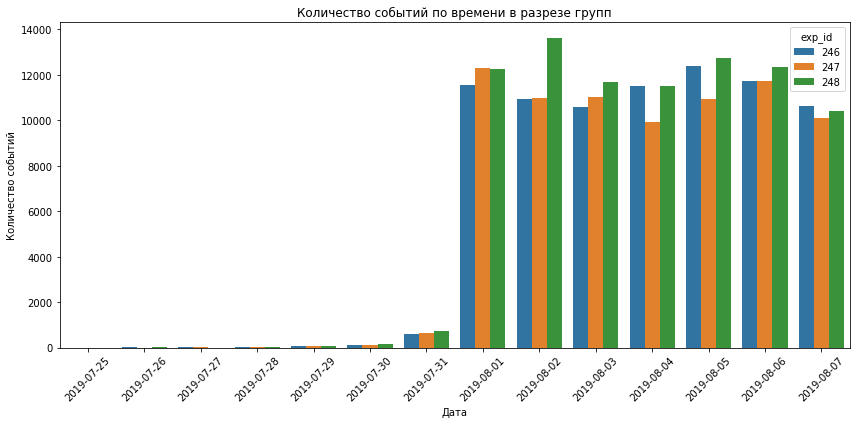

In [16]:
# Группируем данные по дате и экспериментальной группе (exp_id) и считаем количество событий
event_counts = data.groupby([data['date'], 'exp_id']).size().reset_index(name='event_count')

plt.figure(figsize=(12, 6))

sns.barplot(
    x='date', 
    y='event_count', 
    hue='exp_id',  # Разбиение по группам
    data=event_counts,
    ci=None  # Отключаем доверительные интервалы
)

plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Количество событий по времени в разрезе групп')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Судя по представленным диаграммам, у нас не одинаково полные данные за весь период. Данные полные с 2019-08-01. То есть, на самом деле, мы имеем дело с периодом времени в одну неделю.

### Отбросим более старые данные.
Избавимся от данных до 2019-08-01. Напомню, что данные до фильтрации уже были сохраненые в переменных event_count и user_count.

In [17]:
# Фильтруем данные, оставляя только события после 2019-08-01
filter_date = pd.to_datetime("2019-08-01").date()
data_filtered = data.query('date >= @filter_date')

# Считаем количество событий и уникальных пользователей после фильтрации
filtered_event_count = data_filtered.shape[0]
filtered_user_count = data_filtered['device_id_hash'].nunique()

# Посчитаем потерянные данные
lost_events = event_count - filtered_event_count
lost_users = user_count - filtered_user_count

# Выведем результаты
print(f"Количество событий до фильтрации: {event_count}")
print(f"Количество событий после фильтрации: {filtered_event_count}")
print(f"Потеряно событий: {lost_events} или {round((1 - filtered_event_count/event_count)*100, 2)}%")
print()
print(f"Количество уникальных пользователей до фильтрации: {user_count}")
print(f"Количество уникальных пользователей после фильтрации: {filtered_user_count}")
print(f"Потеряно пользователей: {lost_users} или {round((1 - filtered_user_count/user_count)*100, 2)}%")


Количество событий до фильтрации: 243713
Количество событий после фильтрации: 240887
Потеряно событий: 2826 или 1.16%

Количество уникальных пользователей до фильтрации: 7551
Количество уникальных пользователей после фильтрации: 7534
Потеряно пользователей: 17 или 0.23%


После фильтрации мы потеряли около 1% событий и меньше четверти процента пользователей. Я бы сказал, что потери являются незначительными. С такими данными можно работать.

### Проверим, что у нас есть пользователи из всех трёх экспериментальных групп.

In [18]:
users_per_group = data_filtered.groupby('exp_id')['device_id_hash'].nunique()

print("Количество уникальных пользователей в каждой группе:")
print(users_per_group)

Количество уникальных пользователей в каждой группе:
exp_id
246    2484
247    2513
248    2537
Name: device_id_hash, dtype: int64


Как видим, представлены пользователи из каждой группы!

In [19]:
# Напоследок перезапишу отфильтрованные данные для последующего удобства.
data = data_filtered
user_count = filtered_user_count
event_count = filtered_event_count
data['date'].min()

datetime.date(2019, 8, 1)

## Шаг 4. Изучим воронку событий

### Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте

In [20]:
event_counts = data['event_name'].value_counts()
event_counts

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

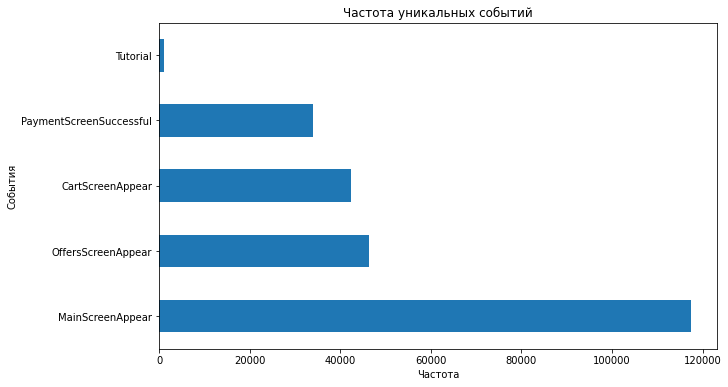

In [21]:
plt.figure(figsize=(10, 6))
event_counts.plot(kind='barh')
plt.title('Частота уникальных событий')
plt.ylabel('События')
plt.xlabel('Частота')
plt.show()

### Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие.

Количество пользователей для каждого события:
                event_name  user_count  user_share
1         MainScreenAppear        7419       98.47
2       OffersScreenAppear        4593       60.96
0         CartScreenAppear        3734       49.56
3  PaymentScreenSuccessful        3539       46.97
4                 Tutorial         840       11.15


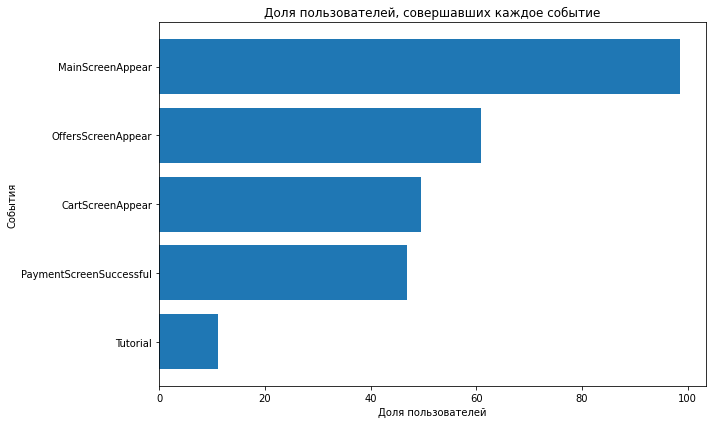

In [22]:
# Группируем по событию и считаем количество уникальных пользователей
event_user_counts = data.groupby('event_name')['device_id_hash'].nunique().reset_index()
event_user_counts.columns = ['event_name', 'user_count']
event_user_counts = event_user_counts.sort_values(by='user_count', ascending=False)

# Рассчитываем долю пользователей, которые совершали каждое событие
event_user_counts['user_share'] = (event_user_counts['user_count'] / user_count * 100).round(2)

print("Количество пользователей для каждого события:")
print(event_user_counts)

# Построим график:
plt.figure(figsize=(10, 6))
plt.barh(event_user_counts['event_name'], event_user_counts['user_share'])
plt.xlabel('Доля пользователей')
plt.ylabel('События')
plt.title('Доля пользователей, совершавших каждое событие')
plt.gca().invert_yaxis()  # Для правильного порядка
plt.tight_layout()
plt.show()

Интересно, что около 1,5% пользователей миновали главный экран.
Это может говорить о том, что обязательной последовательности нет. Вполне вероятно пользователи приходили на страницы товаров по прямой ссылке.

### Предположим, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

Скорей всего порядок следующий:
- MainScreenAppear - Пользователь сначала запускает приложение
- Tutorial - Ему предлагается пройти обучение.
- OffersScreenAppear - Он выбирает предложения. 
- CartScreenAppear - Добавляет товары в корзину. 
- PaymentScreenSuccessful - Оплачивает и переходит на страницу успешного завершения.
<br>
<p>В таком случае, все шаги кроме Tutorial выстраиваются в последовательную цепочку. Доля прошедших обучение настолько мала, что наталкивает на мысль, о том, что его можно пропустить и сразу перейти к следующему шагу. Я бы пропустил это событие при расчете переходов на следующий шаг воронки.

### По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитаем отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.

Ниже я назвал шаги для удобства счета:
- MainScreenAppear - A
- OffersScreenAppear - B
- CartScreenAppear - C
- PaymentScreenSuccessful - D

In [23]:
# Сбросим индексы у таблицы event_user_counts
event_user_counts.reset_index(drop=True, inplace=True)

B_to_A = (event_user_counts['user_count'][1]/event_user_counts['user_count'][0] * 100).round(2)
C_to_B = (event_user_counts['user_count'][2]/event_user_counts['user_count'][1] * 100).round(2)
D_to_C = (event_user_counts['user_count'][3]/event_user_counts['user_count'][2] * 100).round(2)

print(f"Доля переходов из MainScreenAppear в OffersScreenAppear: {B_to_A}%")
print(f"Доля переходов из OffersScreenAppear в CartScreenAppear: {C_to_B}%")
print(f"Доля переходов из CartScreenAppear в PaymentScreenSuccessful: {D_to_C}%")

Доля переходов из MainScreenAppear в OffersScreenAppear: 61.91%
Доля переходов из OffersScreenAppear в CartScreenAppear: 81.3%
Доля переходов из CartScreenAppear в PaymentScreenSuccessful: 94.78%


In [24]:
# Сбросим индексы у таблицы event_user_counts
event_user_counts.reset_index(drop=True, inplace=True)

# Рассчитываем процентное изменение для каждой пары событий
event_user_counts['conversion'] = event_user_counts['user_count'].pct_change() * 100

# Печатаем результаты для каждой пары
print(f"Потери переходов из MainScreenAppear в OffersScreenAppear: {event_user_counts['conversion'][1]:.2f}%")
print(f"Потери переходов из OffersScreenAppear в CartScreenAppear: {event_user_counts['conversion'][2]:.2f}%")
print(f"Потери переходов из CartScreenAppear в PaymentScreenSuccessful: {event_user_counts['conversion'][3]:.2f}%")


Потери переходов из MainScreenAppear в OffersScreenAppear: -38.09%
Потери переходов из OffersScreenAppear в CartScreenAppear: -18.70%
Потери переходов из CartScreenAppear в PaymentScreenSuccessful: -5.22%


### На каком шаге теряете больше всего пользователей?

На каждом этапе воронки есть естественное уменьшение числа пользователей, но самые большие потери происходят между этапами MainScreenAppear и OffersScreenAppear. После чего показатели держатся хорошо.

### Какая доля пользователей доходит от первого события до оплаты?

Чтобы посчитать долю пользователей, которые прошли весь путь от первого события до оплаты, возьмем отношение количества пользователей, которые совершили последнее событие, к количеству пользователей, которые начали с первого события.

In [25]:
D_to_A = (event_user_counts['user_count'][3]/event_user_counts['user_count'][0] * 100).round(2)
print(f"Доля переходов из MainScreenAppear в PaymentScreenSuccessful: {D_to_A}%")

Доля переходов из MainScreenAppear в PaymentScreenSuccessful: 47.7%


Получается, что полный путь от первого шага до последнего проходит почти половина всех пользователей.

<b>На основании проведенного анализа, можно предложить улучшения интерфейса главного экрана, чтобы повысить привлекательность дальнейших шагов. Возможно, стоит сделать более яркие и понятные призывы к действию или улучшить визуализацию товаров/услуг. Ведь именно при переходе с главного экрана теряется большинство пользователей.

## Шаг 5. Изучим результаты эксперимента

### Сколько пользователей в каждой экспериментальной группе?

In [26]:
users_per_group = data_filtered.groupby('exp_id')['device_id_hash'].nunique()

print("Количество уникальных пользователей в каждой группе:")
print(users_per_group)

Количество уникальных пользователей в каждой группе:
exp_id
246    2484
247    2513
248    2537
Name: device_id_hash, dtype: int64


### Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247.

Для проверки гипотез о равенстве долей, процентов или пропорций используем z-тест.

<b>Нулевая гипотеза:</b> Конверсия пользователей, использующих старый шрифт, не отличается от конверсии пользователей, использующих новый шрифт.<br> 
<b>Альтернативная гипотеза:</b> Конверсия пользователей, использующих новый шрифт, отличается от конверсии пользователей, использующих старый шрифт.<br><br>
    На старте устанавливаем уровень статистической значимости = 5%

In [27]:
# Количество уникальных пользователей в каждой группе
#group_246 = data[data['exp_id'] == 246]
#group_247 = data[data['exp_id'] == 247]

# Рассчитаем количество пользователей, совершивших оплату в каждой группе
users_246_paid = group_246[group_246['event_name'] == 'PaymentScreenSuccessful']['device_id_hash'].nunique()
users_247_paid = group_247[group_247['event_name'] == 'PaymentScreenSuccessful']['device_id_hash'].nunique()

# Общее количество пользователей в каждой группе
total_users_246 = group_246['device_id_hash'].nunique()
total_users_247 = group_247['device_id_hash'].nunique()

# Рассчитываем пропорции успеха (доля пользователей, совершивших покупку) в каждой группе
p1 = users_246_paid / total_users_246
p2 = users_247_paid / total_users_247

# Объединённая пропорция успехов по обеим группам
p_combined = (users_246_paid + users_247_paid) / (total_users_246 + total_users_247)

# Разница пропорций в датасетах
difference = p1 - p2

# Считаем статистику в ст. отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / total_users_246 + 1 / total_users_247))

# Задаём стандартное нормальное распределение (среднее 0, ст. отклонение 1)
distr = st.norm(0, 1)

# Рассчитываем p-value
p_value = (1 - distr.cdf(abs(z_value))) * 2

# Уровень значимости
alpha = 0.05

print(f"Пропорция пользователей, совершивших покупку в группе 246: {p1:.4f}")
print(f"Пропорция пользователей, совершивших покупку в группе 247: {p2:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

Пропорция пользователей, совершивших покупку в группе 246: 0.4829
Пропорция пользователей, совершивших покупку в группе 247: 0.4603
p-value: 0.1090
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


На основе этих данных, статистические тесты не нашли убедительных доказательств разницы между двумя контрольными группами. Похоже, что любые различия между этими группами скорее всего являются случайными.

### Выберем самое популярное событие. Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп. Посчитаем долю пользователей, совершивших это событие. Проверим, будет ли отличие между группами статистически достоверным. Проделаем то же самое для всех других событий. Можно ли сказать, что разбиение на группы работает корректно?

Самое популярное событие — это MainScreenAppear, так как оно имеет наибольшее количество пользователей, совершивших его. <br> 
Напомню, что это 7419 пользователей, или 98.47% от всех пользователей.

<b>Посчитаем количество пользователей, совершивших это событие в каждой из контрольных групп и посчитаем долю пользователей, совершивших это событие.

In [28]:
# Посчитаем количество уникальных пользователей, совершивших событие 'MainScreenAppear' в каждой группе
users_246_main_screen = group_246[group_246['event_name'] == 'MainScreenAppear']['device_id_hash'].nunique()
users_247_main_screen = group_247[group_247['event_name'] == 'MainScreenAppear']['device_id_hash'].nunique()

# Рассчитаем долю пользователей, совершивших это событие
share_246_main_screen = users_246_main_screen / total_users_246
share_247_main_screen = users_247_main_screen / total_users_247

print(f"Количество пользователей в группе 246, совершивших событие 'MainScreenAppear': {users_246_main_screen}")
print(f"Количество пользователей в группе 247, совершивших событие 'MainScreenAppear': {users_247_main_screen}")
print()
print(f"Доля пользователей в группе 246, совершивших событие 'MainScreenAppear': {share_246_main_screen:.4f}")
print(f"Доля пользователей в группе 247, совершивших событие 'MainScreenAppear': {share_247_main_screen:.4f}")

Количество пользователей в группе 246, совершивших событие 'MainScreenAppear': 2456
Количество пользователей в группе 247, совершивших событие 'MainScreenAppear': 2482

Доля пользователей в группе 246, совершивших событие 'MainScreenAppear': 0.9867
Доля пользователей в группе 247, совершивших событие 'MainScreenAppear': 0.9849


<b>Проверим, будет ли отличие между группами статистически достоверным. И проделаем это для всех событий. Для этого обернем проверку в отдельную функцию.

In [29]:
def compare_groups(event_name, group1, group2, group1_name, group2_name):
    # Рассчитываем количество пользователей, совершивших событие в каждой группе
    users_group1_event = group1[group1['event_name'] == event_name]['device_id_hash'].nunique()
    users_group2_event = group2[group2['event_name'] == event_name]['device_id_hash'].nunique()

    # Общее количество пользователей в каждой группе
    total_users_group1 = group1['device_id_hash'].nunique()
    total_users_group2 = group2['device_id_hash'].nunique()

    # Пропорция успеха для каждой группы
    p1 = users_group1_event / total_users_group1
    p2 = users_group2_event / total_users_group2

    # Разница пропорций
    difference = p1 - p2

    # Объединённая пропорция успехов по обеим группам
    p_combined = (users_group1_event + users_group2_event) / (total_users_group1 + total_users_group2)

    # Считаем статистику в ст. отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / total_users_group1 + 1 / total_users_group2))

    # Задаём стандартное нормальное распределение (среднее 0, ст. отклонение 1)
    distr = st.norm(0, 1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    alpha = 0.05
    
    print(f"Событие: {event_name}")
    print(f"Пропорция пользователей в '{group1_name}': {p1:.4f}")
    print(f"Пропорция пользователей в '{group2_name}': {p2:.4f}")
    print(f"p-value: {p_value:.4f}")

    if p_value < alpha:
        print(f"Отвергаем нулевую гипотезу: между долями есть значимая разница\n")
    else:
        print(f"Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными\n")


In [30]:
# Список событий для проверки
events = event_user_counts['event_name'].unique()

# Проверяем статистическую значимость для каждого события
for event in events:
    compare_groups(event, group_246, group_247, "группа 246","группа 247")


Событие: MainScreenAppear
Пропорция пользователей в 'группа 246': 0.9867
Пропорция пользователей в 'группа 247': 0.9849
p-value: 0.5857
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: OffersScreenAppear
Пропорция пользователей в 'группа 246': 0.6207
Пропорция пользователей в 'группа 247': 0.6071
p-value: 0.3233
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: CartScreenAppear
Пропорция пользователей в 'группа 246': 0.5102
Пропорция пользователей в 'группа 247': 0.4921
p-value: 0.1982
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: PaymentScreenSuccessful
Пропорция пользователей в 'группа 246': 0.4829
Пропорция пользователей в 'группа 247': 0.4603
p-value: 0.1090
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: Tutorial
Пропорция пользователей в 'группа 246': 0.1121
Пропорция пользователей в 'группа 247': 0.1135
p-value: 0.8757
Не 

Поскольку для всех проверенных событий p-value оказалось выше порога значимости (0.05), мы не можем утверждать, что между группами есть значимая разница. Это означает, что в текущем эксперименте изменения в группах 246 и 247 не привели к статистически значимым различиям по тестируемым событиям. Исходя из этого можно сказать, что разбиение по группам работает корректно!

### Аналогично поступим с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравним результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

Добавим группу 248 и объединенную группу для просчитывания в нашей функции.

In [31]:
#group_248 = data[data['exp_id'] == 248]
group_control = data[data['exp_id'].isin([246, 247])]

In [32]:
for event in events:
    compare_groups(event, group_248, group_control, 'группа 248', 'объединённая контрольная группа')

Событие: MainScreenAppear
Пропорция пользователей в 'группа 248': 0.9839
Пропорция пользователей в 'объединённая контрольная группа': 0.9858
p-value: 0.5146
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: OffersScreenAppear
Пропорция пользователей в 'группа 248': 0.6050
Пропорция пользователей в 'объединённая контрольная группа': 0.6128
p-value: 0.5152
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: CartScreenAppear
Пропорция пользователей в 'группа 248': 0.4874
Пропорция пользователей в 'объединённая контрольная группа': 0.5011
p-value: 0.2611
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: PaymentScreenSuccessful
Пропорция пользователей в 'группа 248': 0.4662
Пропорция пользователей в 'объединённая контрольная группа': 0.4719
p-value: 0.6384
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: Tutorial
Пропорция пользователей в 'гр

<b>Из результатов экспериментов видно, что отсутствют значимые различия.</b> <br> На основании p-value, который во всех случаях значительно выше 0.05, можно сделать вывод, что изменения, связанные с шрифтом в группе 248, не оказывают статистически значимого влияния на поведение пользователей по сравнению с контрольными группами.

### Посчитаем, сколько проверок статистических гипотез мы сделали. Какой уровень значимости стоит применить? Если мы хотим изменить его, проделаем предыдущие пункты и проверим свои выводы.

В предыдущем анализе был использован уровень значимости 0.05, что является стандартным выбором для большинства статистических проверок. Это означает, что мы готовы ошибочно отклонить нулевую гипотезу (что между группами нет различий) в 5% случаев, если она действительно верна.

Мы проводили тестирование для 5 различных событий (MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful, и Tutorial), и для каждого события делали две проверки (группа 248 против контрольной группы). То есть мы провели 10 проверок статистических гипотез.

<p>Когда проводятся множественные проверки гипотез (10 тестов в нашем случае), существует риск увеличения ошибки первого рода (ложное отклонение нулевой гипотезы).</p>

<p>Если мы используем уровень значимости 0.05 для каждого теста, то вероятность хотя бы одной ошибки первого рода в 10 тестах будет равна:</p>

In [33]:
1 - (1 - 0.05)**10

0.4012630607616213

То есть, существует 40% шанс на хотя бы одну ошибку первого рода в 10 тестах, что значительно выше стандартного уровня 0.05

<p>Для того чтобы уменьшить вероятность ошибки первого рода, можно применить одну из корректировок для множественных сравнений. Одним из популярных методов является Коррекция Бонферрони, которая делит выбранный уровень значимости на количество тестов. Для нашего случая:</p>

In [34]:
0.05/10

0.005

<p>Теперь уровень значимости для каждого теста будет 0.005.</p>

<p>Это уменьшит вероятность ошибки первого рода, так как теперь вероятность хотя бы одной ошибки первого рода будет:

In [35]:
1 - (1 - 0.005)**10

0.048889869534228136

То есть, вероятность ошибки первого рода уменьшается до 4.88%.

<b>Но стоит учитывать АА тест и проверку ниже, тогда всего тестов 20.

In [36]:
1 - (1 - 0.05)**20

0.6415140775914581

64% шанс на хотя бы одну ошибку первого рода в 20 тестах

In [37]:
0.05/20

0.0025

Теперь уровень значимости для каждого теста будет 0.0025

In [38]:
1 - (1 - 0.0025)**20

0.04883012474683324

Вероятность ошибки первого рода уменьшается до 4.88%

<b>Внесем изменения в нашу функцию:

In [39]:
def compare_groups(event_name, group1, group2, group1_name, group2_name):
    # Рассчитываем количество пользователей, совершивших событие в каждой группе
    users_group1_event = group1[group1['event_name'] == event_name]['device_id_hash'].nunique()
    users_group2_event = group2[group2['event_name'] == event_name]['device_id_hash'].nunique()

    # Общее количество пользователей в каждой группе
    total_users_group1 = group1['device_id_hash'].nunique()
    total_users_group2 = group2['device_id_hash'].nunique()

    # Пропорция успеха для каждой группы
    p1 = users_group1_event / total_users_group1
    p2 = users_group2_event / total_users_group2

    # Разница пропорций
    difference = p1 - p2

    # Объединённая пропорция успехов по обеим группам
    p_combined = (users_group1_event + users_group2_event) / (total_users_group1 + total_users_group2)

    # Считаем статистику в ст. отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / total_users_group1 + 1 / total_users_group2))

    # Задаём стандартное нормальное распределение (среднее 0, ст. отклонение 1)
    distr = st.norm(0, 1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    alpha = 0.0025
    
    print(f"Событие: {event_name}")
    print(f"Пропорция пользователей в '{group1_name}': {p1:.4f}")
    print(f"Пропорция пользователей в '{group2_name}': {p2:.4f}")
    print(f"p-value: {p_value:.4f}")

    if p_value < alpha:
        print(f"Отвергаем нулевую гипотезу: между долями есть значимая разница\n")
    else:
        print(f"Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными\n")


In [40]:
for event in events:
    compare_groups(event, group_248, group_control, 'группа 248', 'объединённая контрольная группа')

Событие: MainScreenAppear
Пропорция пользователей в 'группа 248': 0.9839
Пропорция пользователей в 'объединённая контрольная группа': 0.9858
p-value: 0.5146
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: OffersScreenAppear
Пропорция пользователей в 'группа 248': 0.6050
Пропорция пользователей в 'объединённая контрольная группа': 0.6128
p-value: 0.5152
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: CartScreenAppear
Пропорция пользователей в 'группа 248': 0.4874
Пропорция пользователей в 'объединённая контрольная группа': 0.5011
p-value: 0.2611
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: PaymentScreenSuccessful
Пропорция пользователей в 'группа 248': 0.4662
Пропорция пользователей в 'объединённая контрольная группа': 0.4719
p-value: 0.6384
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: Tutorial
Пропорция пользователей в 'гр

Опять же, ни по одному событию не удалось отвергнуть нулевую гипотезу. Для всех событий p-value значительно выше уровня значимости 0.005. Это значит, что у нас нет оснований утверждать, что между группой с изменённым шрифтом и объединённой контрольной группой есть статистически значимые различия в пропорциях пользователей.

# Вывод
По результатам нашего проекта, мы выяснили, что изменение шрифта не оказывает значимого влияния на пользовательское поведение на всех этапах воронки. Доля пользователей, выполнивших события, остаётся примерно одинаковой в обеих группах. С другой стороны, изменение шрифта не улучшает метрики. То есть, с точки зрения данных, такое изменение не выглядит целесообразным. Если внедрение нового шрифта связано с дополнительными затратами, возможно, их стоит избегать, поскольку эффект от изменения отсутствует. Эксперимент показал, что изменение шрифта не приводит к значимым улучшениям пользовательского поведения, и текущий дизайн интерфейса можно считать удовлетворительным.